## Getting Started < EDA Visualization >

### Prerequisite Modules

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import koreanize_matplotlib

import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px


In [4]:
df = pd.read_csv("/home/kkyu/amr_ws/DL/IoT_Project/iot-repo-5/data/environment_test.csv")
df

,Date,Temperature (°C),Humidity (%),CO2 (PPM),PM-10 (μg/m3)
0,2024-03-09 21:24:14,23.8,24.0,144,41.66
1,2024-03-09 21:24:16,23.8,24.0,144,41.66
2,2024-03-09 21:24:18,23.8,24.0,145,32.86
3,2024-03-09 21:24:19,23.8,24.0,146,27.98
4,2024-03-09 21:24:21,23.8,24.0,144,28.95
...,...,...,...,...,...
128,2024-03-09 21:28:30,23.8,24.0,144,25.04
129,2024-03-09 21:28:32,23.8,24.0,143,16.25
130,2024-03-09 21:28:34,23.8,24.0,145,27.00
131,2024-03-09 21:28:36,23.8,24.0,145,16.25


### 테스트용 -> Place 컬럼 랜덤 추가 (1~5)

In [5]:
df['Place'] = np.random.randint(1, 6, size=len(df))

df

,Date,Temperature (°C),Humidity (%),CO2 (PPM),PM-10 (μg/m3),Place
0,2024-03-09 21:24:14,23.8,24.0,144,41.66,5
1,2024-03-09 21:24:16,23.8,24.0,144,41.66,2
2,2024-03-09 21:24:18,23.8,24.0,145,32.86,2
3,2024-03-09 21:24:19,23.8,24.0,146,27.98,2
4,2024-03-09 21:24:21,23.8,24.0,144,28.95,1
...,...,...,...,...,...,...
128,2024-03-09 21:28:30,23.8,24.0,144,25.04,1
129,2024-03-09 21:28:32,23.8,24.0,143,16.25,3
130,2024-03-09 21:28:34,23.8,24.0,145,27.00,5
131,2024-03-09 21:28:36,23.8,24.0,145,16.25,2


In [6]:
df = df.set_index("Date")
df

,Temperature (°C),Humidity (%),CO2 (PPM),PM-10 (μg/m3),Place
Date,,,,,
2024-03-09 21:24:14,23.8,24.0,144,41.66,5
2024-03-09 21:24:16,23.8,24.0,144,41.66,2
2024-03-09 21:24:18,23.8,24.0,145,32.86,2
2024-03-09 21:24:19,23.8,24.0,146,27.98,2
2024-03-09 21:24:21,23.8,24.0,144,28.95,1
...,...,...,...,...,...
2024-03-09 21:28:30,23.8,24.0,144,25.04,1
2024-03-09 21:28:32,23.8,24.0,143,16.25,3
2024-03-09 21:28:34,23.8,24.0,145,27.00,5


### AQI 계산 및 범위 값에 따른 상태 설정

In [7]:
df['AQI'] = 0

for index, row in df.iterrows():
    PM_10_value = row['PM-10 (μg/m3)']
    AQI_value = ((100 - 51) / (80 - 31)) * (PM_10_value - 31) + 51
    df.at[index, 'AQI'] = AQI_value

df

/tmp/ipykernel_22988/3247769390.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '61.66' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[index, 'AQI'] = AQI_value


,Temperature (°C),Humidity (%),CO2 (PPM),PM-10 (μg/m3),Place,AQI
Date,,,,,,
2024-03-09 21:24:14,23.8,24.0,144,41.66,5,61.66
2024-03-09 21:24:16,23.8,24.0,144,41.66,2,61.66
2024-03-09 21:24:18,23.8,24.0,145,32.86,2,52.86
2024-03-09 21:24:19,23.8,24.0,146,27.98,2,47.98
2024-03-09 21:24:21,23.8,24.0,144,28.95,1,48.95
...,...,...,...,...,...,...
2024-03-09 21:28:30,23.8,24.0,144,25.04,1,45.04
2024-03-09 21:28:32,23.8,24.0,143,16.25,3,36.25
2024-03-09 21:28:34,23.8,24.0,145,27.00,5,47.00


In [8]:
df['AQI_Bucket'] = pd.cut(df['AQI'], bins=[0, 50, 100, 250, 500], labels=['Good', 'Moderate', 'Unhealthy', 'Very Unhealthy'])

df

,Temperature (°C),Humidity (%),CO2 (PPM),PM-10 (μg/m3),Place,AQI,AQI_Bucket
Date,,,,,,,
2024-03-09 21:24:14,23.8,24.0,144,41.66,5,61.66,Moderate
2024-03-09 21:24:16,23.8,24.0,144,41.66,2,61.66,Moderate
2024-03-09 21:24:18,23.8,24.0,145,32.86,2,52.86,Moderate
2024-03-09 21:24:19,23.8,24.0,146,27.98,2,47.98,Good
2024-03-09 21:24:21,23.8,24.0,144,28.95,1,48.95,Good
...,...,...,...,...,...,...,...
2024-03-09 21:28:30,23.8,24.0,144,25.04,1,45.04,Good
2024-03-09 21:28:32,23.8,24.0,143,16.25,3,36.25,Good
2024-03-09 21:28:34,23.8,24.0,145,27.00,5,47.00,Good


### EDA

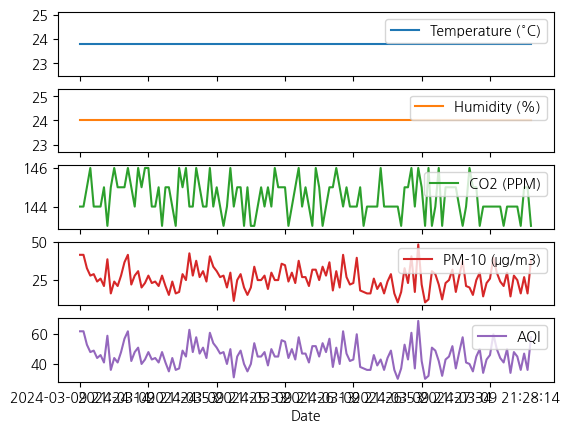

In [9]:
df_sec = df[["Temperature (°C)", "Humidity (%)", "CO2 (PPM)", "PM-10 (μg/m3)", "AQI"]]  

df_sec.plot(subplots=True)
plt.show()


In [10]:
fig = make_subplots(rows=1, cols=5, subplot_titles=['Place 1', 'Place 2', 'Place 3', 'Place 4', 'Place 5'])

# 각 장소에 대한 AQI 분포 히스토그램 추가
# y축은 빈도수를 나타냄
for i, place in enumerate(range(1, 6), start=1):
    trace = go.Histogram(x=df[df['Place'] == place]['AQI'], name=f'Place {place}')
    fig.add_trace(trace, row=1, col=i)

fig.update_layout(title_text="각 Place의 AQI 분포", showlegend=False)
fig.show()


In [11]:
fig = make_subplots(rows=1, cols=1)

# 각 장소별로 AQI 지표를 상자 그림으로 추가
box_traces = []
for place in range(1, 6):
    box_trace = go.Box(y=df[df['Place'] == place]['AQI'], name=f'Place {place}', boxmean=True)
    box_traces.append(box_trace)

for trace in box_traces:
    fig.add_trace(trace)

fig.update_layout(title_text="각 Place의 AQI 지표")
fig.show()


In [12]:
# 각 장소별 AQI 버킷의 빈도수 계산
freq_data = df.groupby(['Place', 'AQI_Bucket']).size().unstack(fill_value=0)

fig = go.Figure()

for place in range(1, 6):
    fig.add_trace(go.Bar(x=freq_data.columns, y=freq_data.loc[place], name=f'Place {place}'))

fig.update_layout(barmode='stack', title="각 장소별 AQI 버킷의 빈도수", xaxis_title="AQI 버킷", yaxis_title="빈도수")
fig.show()

/tmp/ipykernel_22988/1030527442.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [13]:
# 각 장소별 평균 AQI 계산
avg_aqi = df.groupby('Place')['AQI'].mean().reset_index()

fig = px.pie(avg_aqi, values='AQI', names='Place', title='Major Place Average AQI')
fig.show()

In [14]:
# 각 장소별 평균 AQI 계산
avg_aqi = df.groupby('Place')['AQI'].mean().reset_index()

fig = px.line(avg_aqi, x='Place', y='AQI', title='각 Place를 별 AQI 지표', markers=True)
fig.show()


/tmp/ipykernel_22988/2868920696.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




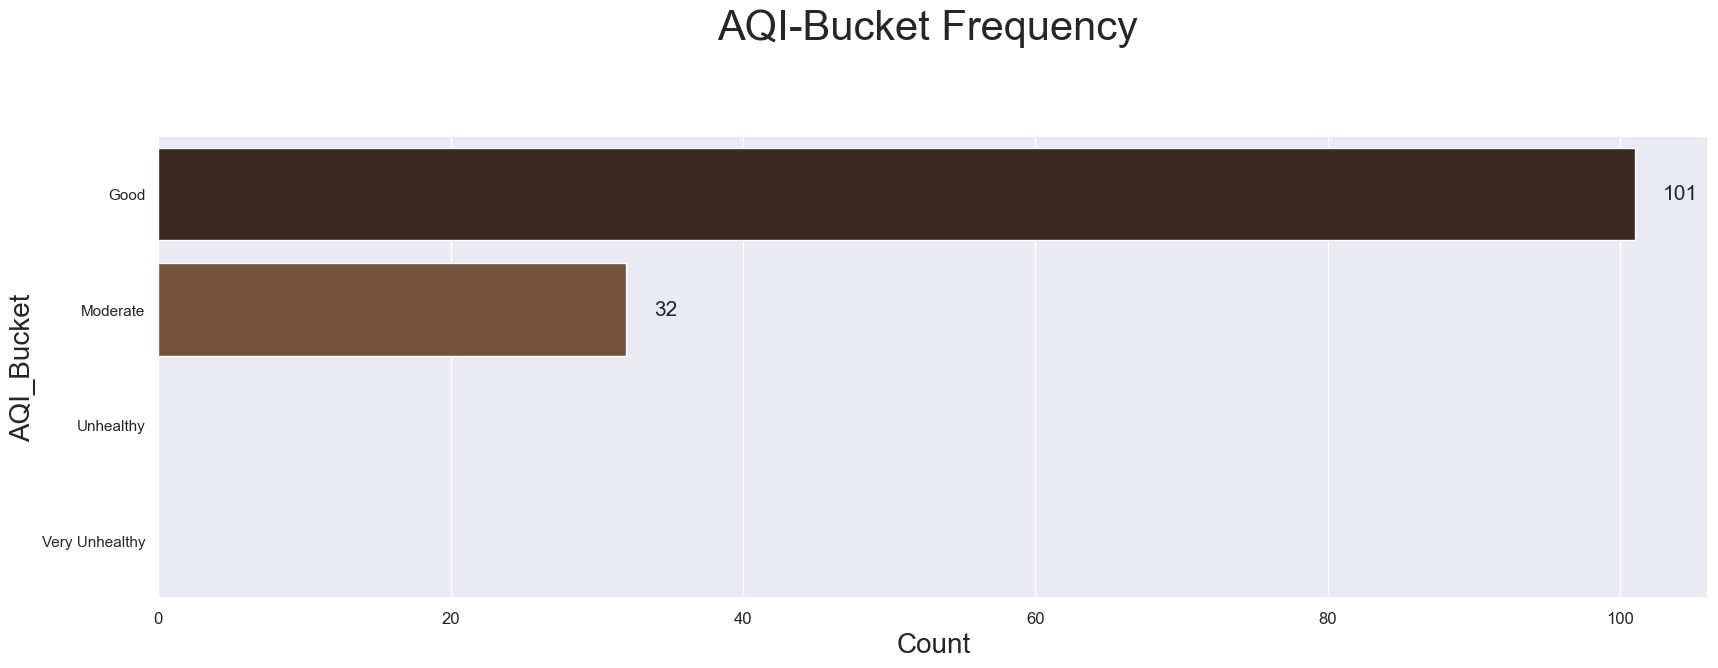

In [15]:
sns.set(rc={'figure.figsize':(20,6)})
plt.xticks(fontsize=12)
p = sns.countplot(y=df['AQI_Bucket'], order=df['AQI_Bucket'].value_counts().index, palette='copper')
p.set_xlabel('Count', fontsize=20)
p.set_ylabel('AQI_Bucket', fontsize=20)
for container in p.containers:
    p.bar_label(container, label_type='edge', padding=20, fontsize=15, rotation=0)
p.axes.set_title("AQI-Bucket Frequency \n\n", fontsize=30)
plt.show()


/tmp/ipykernel_22988/3372702077.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




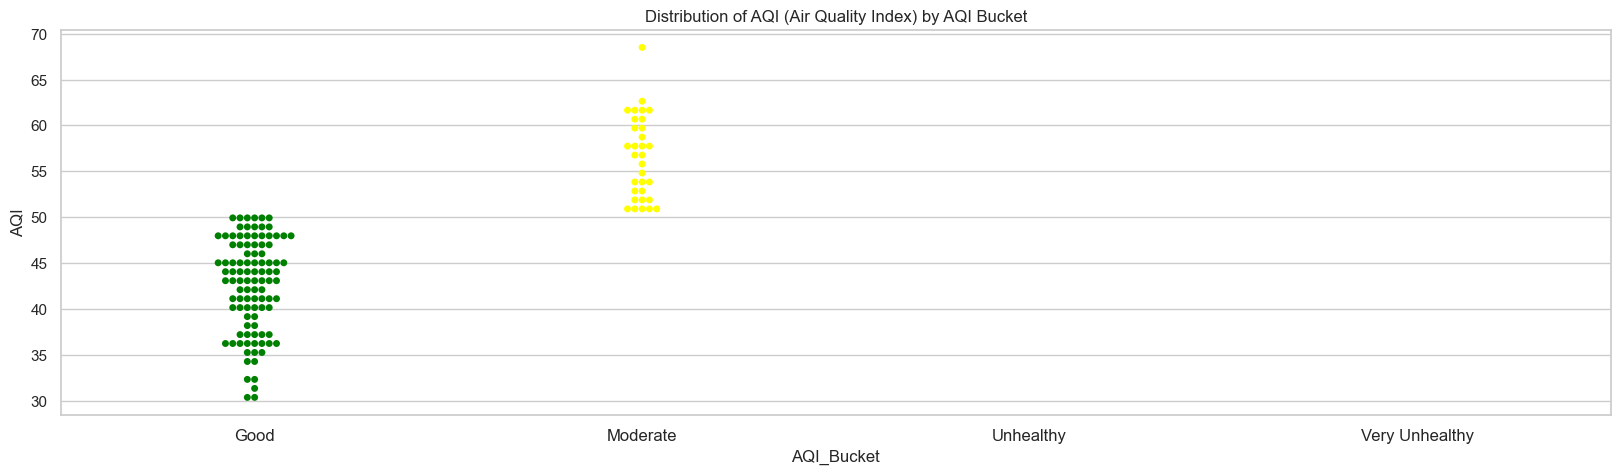

In [16]:
sns.set(rc={'figure.figsize':(20,5)})

sns.set_style("whitegrid")
palette = {"Good": "green", 
           "Moderate": "yellow",
           "Unhealthy for Sensitive Groups": "orange",
           "Unhealthy": "red",
           "Very Unhealthy": "darkred"}

sns.swarmplot(data=df, x=df['AQI_Bucket'], y='AQI', order=['Good', 'Moderate', 'Unhealthy', 'Very Unhealthy'], palette=palette)

plt.title('Distribution of AQI (Air Quality Index) by AQI Bucket')
plt.xticks(fontsize=12)

plt.show()


/tmp/ipykernel_22988/1477228242.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'AQI Values Distribution')

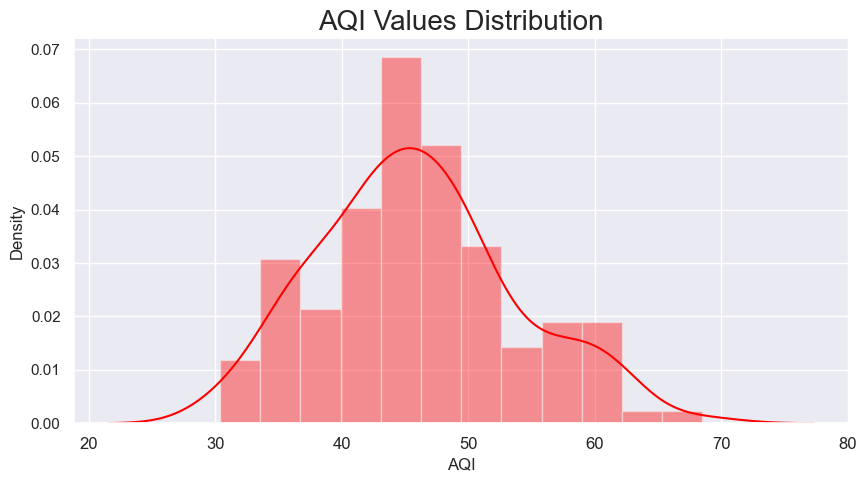

In [17]:
sns.set(rc={'figure.figsize':(10,5)})
plt.xticks(fontsize=12)
p=sns.distplot(df['AQI'],color='Red')
p.axes.set_title("AQI Values Distribution",fontsize=20)

/tmp/ipykernel_22988/4026923081.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




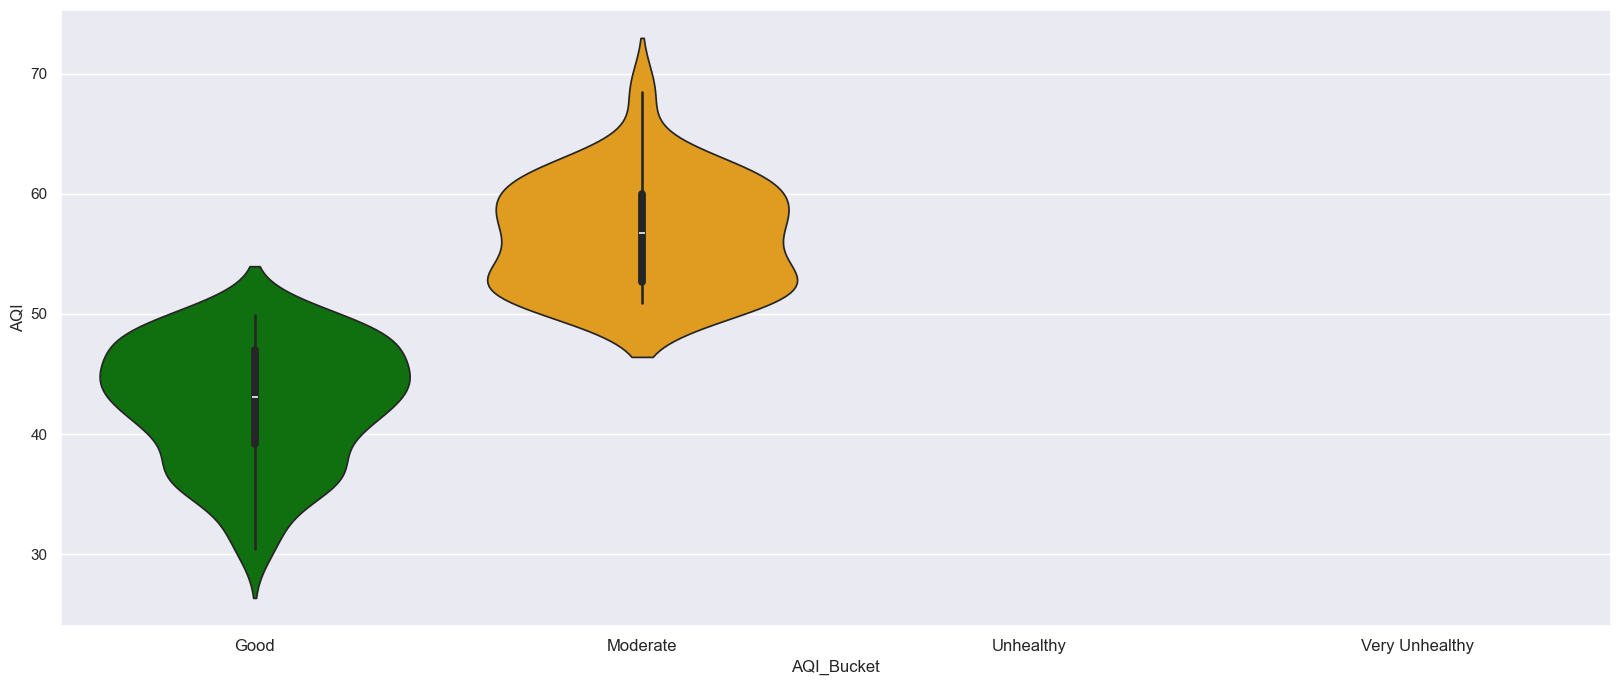

In [18]:
sns.set(rc={'figure.figsize':(20,8)})
plt.xticks(fontsize=12)

df['AQI'] = pd.to_numeric(df['AQI'])
custom_palette = {'Good': 'green', 'Moderate': 'orange', 'Unhealthy': 'red', 'Very Unhealthy': 'purple'}

sns.violinplot(data=df, x=df['AQI_Bucket'], y=df['AQI'], order=['Good', 'Moderate', 'Unhealthy', 'Very Unhealthy'], palette=custom_palette)
plt.show()

/tmp/ipykernel_22988/2212624895.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




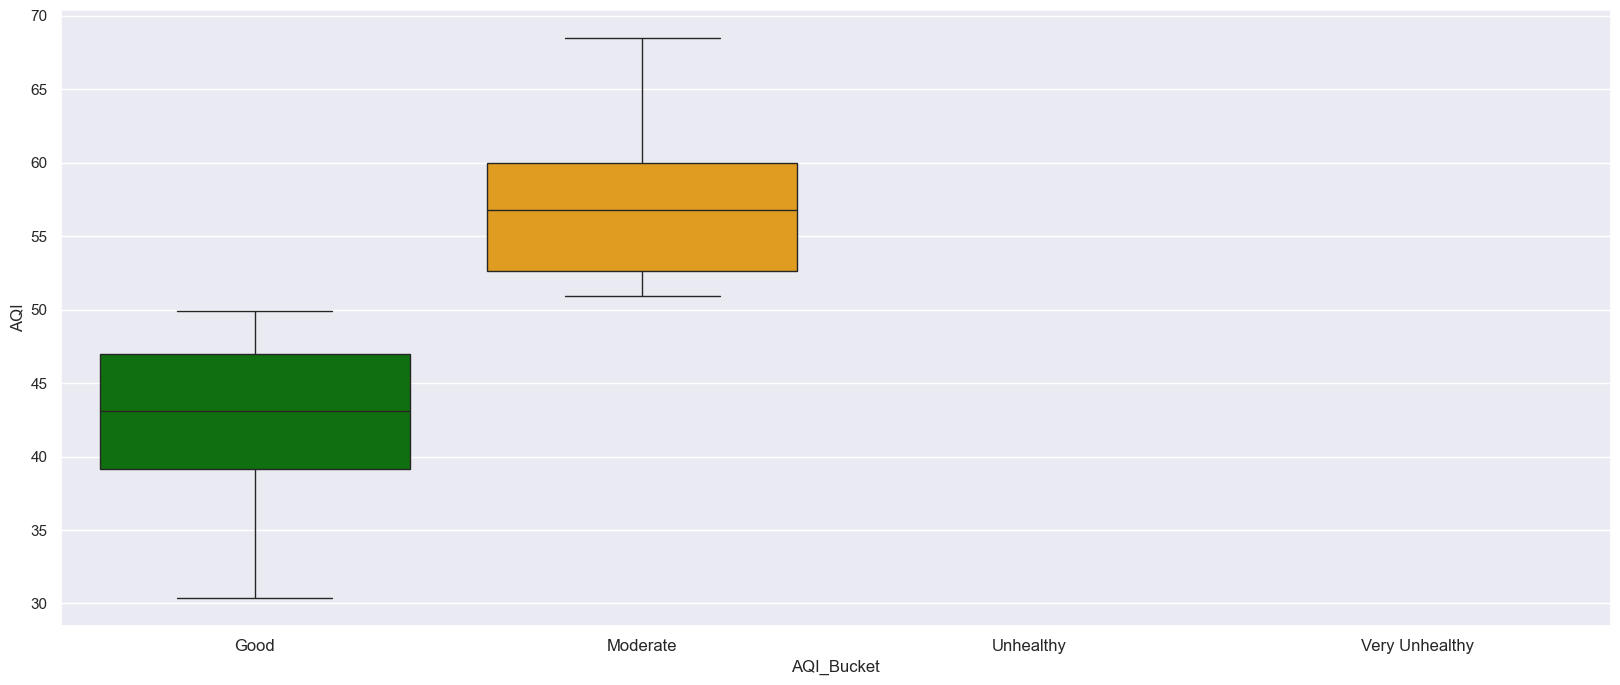

In [19]:
sns.set(rc={'figure.figsize':(20,8)})
plt.xticks(fontsize=12)

df['AQI'] = pd.to_numeric(df['AQI'])
custom_palette = {'Good': 'green', 'Moderate': 'orange', 'Unhealthy': 'red', 'Very Unhealthy': 'purple'}

sns.boxplot(data=df, x=df['AQI_Bucket'], y=df['AQI'], order=['Good', 'Moderate', 'Unhealthy', 'Very Unhealthy'], palette=custom_palette)
plt.show()